# Uma rede neural funciona em duas etapas:

1. Feed Forward

2. Retropropagação

# Feed Forward
Na etapa de feed forward, a saída final de uma rede neural é criada. Vamos tentar encontrar o resultado final de nossa rede neural.

# Retropropagação
O objetivo da retropropagação é minimizar a perda geral, encontrando os valores ideais dos pesos. A função de perda que vamos usar nesta seção é o erro quadrático médio

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
# reading dataset
banknote_data = pd.read_csv('https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv')

In [4]:
banknote_data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
banknote_data.shape

(1372, 5)

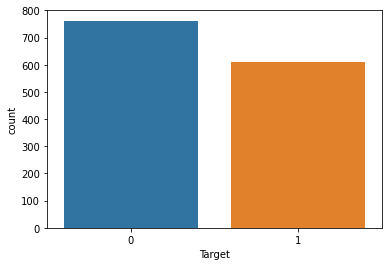

In [6]:
sns.countplot(x='Target', data=banknote_data)

In [7]:
X = banknote_data.drop(['Target'], axis=1).values
y = banknote_data[['Target']].values

In [8]:
print(X.shape)
print(y.shape)

(1372, 4)
(1372, 1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
def create_model(learning_rate, dropout_rate):

    #create sequential model
    model = Sequential()

    #adding dense layers
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    #compiling the model
    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [12]:
dropout_rate = 0.1
epochs = 20
batch_size = 4
learn_rate = 0.001

In [13]:
model = create_model(learn_rate, dropout_rate)

/opt/python/envs/default/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
# !pip install pydot

In [15]:
# !pip install graphviz

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [17]:
model_history = model.fit(X_train, y_train, batch_size=batch_size,
                          epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/20
220/220 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.8130 - val_loss: 0.4154 - val_accuracy: 0.9591
Epoch 2/20
220/220 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.9099 - val_loss: 0.2079 - val_accuracy: 0.9545
Epoch 3/20
220/220 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9430 - val_loss: 0.1096 - val_accuracy: 0.9773
Epoch 4/20
220/220 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9635 - val_loss: 0.0675 - val_accuracy: 0.9818
Epoch 5/20
220/220 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9681 - val_loss: 0.0490 - val_accuracy: 0.9864
Epoch 6/20
220/220 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9692 - val_loss: 0.0391 - val_accuracy: 0.9864
Epoch 7/20
220/220 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9726 - val_loss: 0.0301 - val_accuracy: 0.9955
Epoch 

In [18]:
accuracies = model.evaluate(X_test, y_test, verbose=1)
print('Test Score: ', accuracies[0])
print('Test Accuracy: ', accuracies[1])

9/9 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Test Score:  0.0068887146189808846
Test Accuracy:  1.0


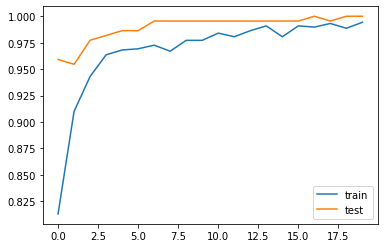

In [22]:
import matplotlib.pylab as plt
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend(['train', 'test'], loc='lower right')

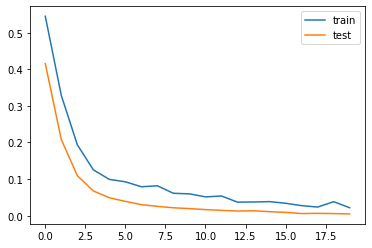

In [24]:
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper right')

In [27]:
#importing mnist datase
mnist_data = tf.keras.datasets.fashion_mnist

#dividing data into training and test sets
(training_images, training_labels), (test_images, test_labels) = mnist_data .load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [28]:
training_images, test_images = training_images/255.0, test_images/255.0

In [29]:
print(training_images.shape)

(60000, 28, 28)


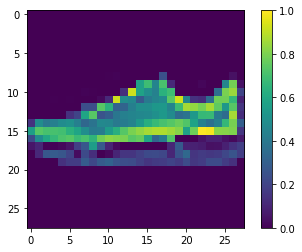

In [30]:
#plotting image number 9 from test set
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
#converting data into the right shape
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [32]:
#printing number of output classes
output_classes = len(set(training_labels))
print('Number of output classes is: ', output_classes)

Number of output classes is:  10


In [33]:
training_images[0].shape

(28, 28, 1)

In [40]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
